# Yeni Bölüm

4422102/4422102 [==============================] - 1s 0us/step


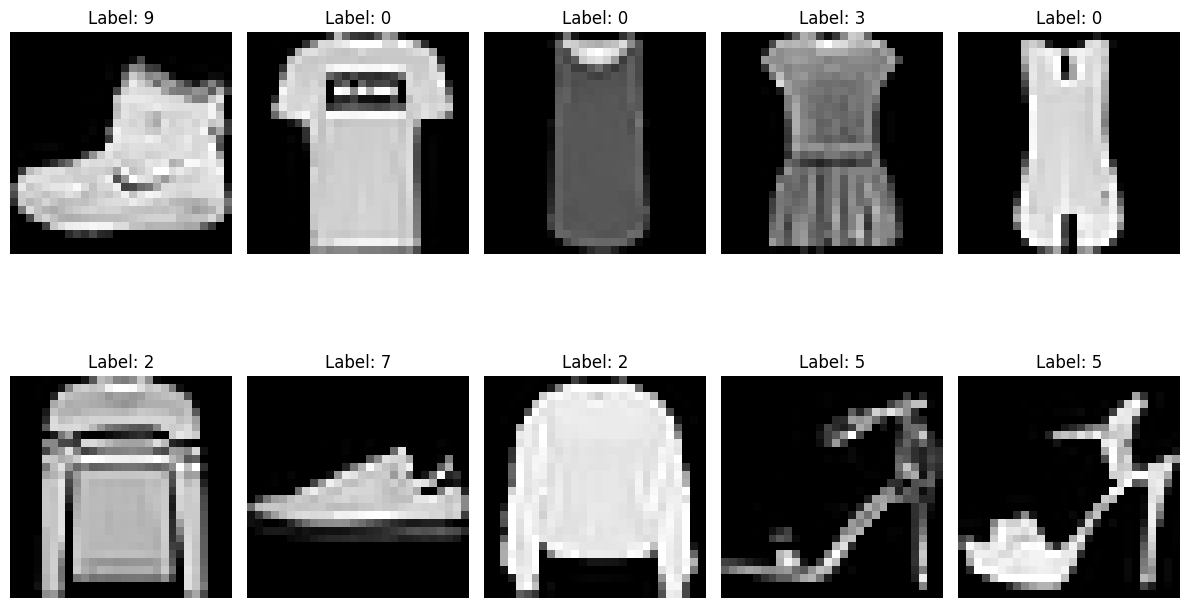

Eğitim veri seti boyutu: (60000, 28, 28)
Test veri seti boyutu: (10000, 28, 28)
Görüntü boyutu: 28 x 28
Logistic Regression modeli eğitiliyor...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Modeli Değerlendirme Sonuçları:
Doğruluk: 0.8508
Duyarlılık: 0.8508
F1-Skor: 0.8501
Hassasiyet: 0.8500
AUC: 0.9845134336513561
---------------------
LightGBM modeli eğitiliyor...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.463156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 169738
[LightGBM] [Info] Number of data points in the train set: 48000, number of used features: 783
[LightGBM] [Info] Start training from score -2.303002
[LightGBM] [Info] Start training from score -2.306551
[LightGBM] [Info] Start training from score -2.303627
[LightGBM] [Info] Start training from score -2.299257
[LightGBM] [Info] Start training from score -2.303002
[LightGBM] [Info] Start training from score -2.304879
[LightGBM] [Info] Start training from score -2.306342
[LightGBM] [Info] Start training from score -2.294080
[LightGBM] [Info] Start training from score -2.301960
[LightGBM] [Info] Start

,Logistic Regression,LightGBM,KNN,Decision Tree,Random Forest
Doğruluk,0.850833,0.899417,0.852750,0.805750,0.881250
Hassasiyet,0.849999,0.899020,0.855119,0.808334,0.880690
Duyarlılık,0.850833,0.899417,0.852750,0.805750,0.881250
F1-Skor,0.850091,0.898904,0.851398,0.805677,0.879775
AUC,0.984513,0.993178,0.969026,0.959700,0.990837


In [1]:
# Gerekli kütüphaneleri import edelim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.datasets import fashion_mnist

# Fashion MNIST veri setini yükleyelim
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# İlk 10 örneği görselleştirelim
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Veri setinin boyutlarını ve birkaç örneği görselleştirelim
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
print("Eğitim veri seti boyutu:", X_train.shape)
print("Test veri seti boyutu:", X_test.shape)
print("Görüntü boyutu:", img_rows, "x", img_cols)



# Verileri normalize edelim (0-1 arası değerler)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Veri setlerini eğitim, doğrulama ve test olarak bölelim
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Kullanılacak modellerin listesini oluşturalım
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Her bir model için eğitim ve değerlendirme işlemlerini yapalım
results = {}
for name, model in models.items():
    print(f"{name} modeli eğitiliyor...")
    model.fit(X_train.reshape(-1, img_rows * img_cols), y_train)
    y_pred = model.predict(X_val.reshape(-1, img_rows * img_cols))
    y_prob = None

    # Bazı modeller (örneğin KNN) yalnızca tahminleri döndürür, y_prob kullanılamaz
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_val.reshape(-1, img_rows * img_cols))

    # Değerlendirme metriklerini hesaplayalım
    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    precision = precision_score(y_val, y_pred, average='weighted')

    # ROC-AUC için y_prob'u kullanalım (y_prob'un olup olmadığını kontrol edelim)
    auc = roc_auc_score(y_val, y_prob, average='weighted', multi_class='ovr') if y_prob is not None else None

    results[name] = {
        "Doğruluk": accuracy,
        "Hassasiyet": precision,
        "Duyarlılık": recall,
        "F1-Skor": f1,
        "AUC": auc if auc is not None else "NA"
    }

    # Değerlendirme sonuçlarını yazdıralım
    print(f"{name} Modeli Değerlendirme Sonuçları:")
    print(f"Doğruluk: {accuracy:.4f}")
    print(f"Duyarlılık: {recall:.4f}")
    print(f"F1-Skor: {f1:.4f}")
    print(f"Hassasiyet: {precision:.4f}")
    print(f"AUC: {auc if auc is not None else 'NA'}")
    print("---------------------")

# Sonuçları tablo şeklinde gösterelim
import pandas as pd

results_df = pd.DataFrame(results)
results_df